# Data Description

In [38]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pycountry
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from scipy import stats
from collections import Counter
nltk.download('punkt')
nltk.download('stopwords')
import nbconvert

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kristenfinley/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kristenfinley/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Importing Source Data
---

In [18]:
# Read the CSV file into a DataFrame
df = pd.read_csv("job_title_des.csv")

# Display the first few rows to understand the structure
df.head()

,Unnamed: 0,Job Title,Job Description
0,0,Flutter Developer,We are looking for hire experts flutter develo...
1,1,Django Developer,PYTHON/DJANGO (Developer/Lead) - Job Code(PDJ ...
2,2,Machine Learning,"Data Scientist (Contractor)\n\nBangalore, IN\n..."
3,3,iOS Developer,JOB DESCRIPTION:\n\nStrong framework outside o...
4,4,Full Stack Developer,job responsibility full stack engineer – react...


## Data Exploration
---


In [19]:
# Check column names and data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       2277 non-null   int64 
 1   Job Title        2277 non-null   object
 2   Job Description  2277 non-null   object
dtypes: int64(1), object(2)
memory usage: 53.5+ KB
None


### Find all the Job Titles in Dataset

In [20]:
# Count of unique values in categorical columns
print(df['Job Title'].value_counts())

Job Title
JavaScript Developer      166
Java Developer            161
Software Engineer         160
Node js developer         160
iOS Developer             159
PHP Developer             156
Flutter Developer         155
DevOps Engineer           155
Django Developer          152
Machine Learning          152
Backend Developer         147
Network Administrator     145
Database Administrator    139
Full Stack Developer      138
Wordpress Developer       132
Name: count, dtype: int64


In [21]:
unique_job_titles = df['Job Title'].unique()

In [22]:
sorted_job_titles = sorted(unique_job_titles)

In [23]:
with open('unique_job_titles.txt', 'w') as file:
    for title in sorted_job_titles:
        file.write(title + '\n')

In [24]:
# Count job title frequencies
job_title_counts = df['Job Title'].value_counts()

with open('unique_job_titles.txt', 'w') as file:
    for title in sorted_job_titles:
        file.write(title + '\n')
        
# Print the frequency of each job title
print(job_title_counts)


# Save frequencies to a CSV file
job_title_counts.to_csv('job_title_frequencies.csv', header=['Frequency'])

print("Job title frequencies saved to job_title_frequencies.csv")


Job Title
JavaScript Developer      166
Java Developer            161
Software Engineer         160
Node js developer         160
iOS Developer             159
PHP Developer             156
Flutter Developer         155
DevOps Engineer           155
Django Developer          152
Machine Learning          152
Backend Developer         147
Network Administrator     145
Database Administrator    139
Full Stack Developer      138
Wordpress Developer       132
Name: count, dtype: int64
Job title frequencies saved to job_title_frequencies.csv


### Find all the Locations (Countries) in the Dataset

In [25]:
#extracting countries from text in data descriptions
def extract_countries(text):
    countries = set()
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stopwords.words('english')]
    for token in tokens:
        try:
            country = pycountry.countries.lookup(token.capitalize())
            countries.add(country.name)
        except LookupError:
            pass
    return list(countries)


In [26]:
df['Countries'] = df['Job Description'].apply(extract_countries)

In [27]:
print(df[['Job Title', 'Countries']])

                  Job Title          Countries
0         Flutter Developer             [Peru]
1          Django Developer                 []
2          Machine Learning            [India]
3             iOS Developer                 []
4      Full Stack Developer                 []
...                     ...                ...
2272      Backend Developer  [Angola, Croatia]
2273   Full Stack Developer                 []
2274  Network Administrator             [Peru]
2275       Machine Learning    [United States]
2276   Full Stack Developer                 []

[2277 rows x 2 columns]


In [28]:
unique_countries = set()
for countries_list in df['Countries']:
    unique_countries.update(countries_list)

In [29]:
with open('unique_countries.txt', 'w') as file:
    sorted_countries = sorted(unique_countries)  # Sort countries alphabetically
    for country in sorted_countries:
        file.write(country + '\n')


In [31]:
# Flatten and calculate frequencies of countries
country_frequencies = {}
for countries_list in df['Countries']:
    for country in countries_list:
        if country in country_frequencies:
            country_frequencies[country] += 1
        else:
            country_frequencies[country] = 1

# Convert to pandas Series for easy manipulation and sorting
country_freq_series = pd.Series(country_frequencies)


In [32]:
# Sort frequencies in descending order
country_freq_sorted = country_freq_series.sort_values(ascending=False)

# Calculate total frequency
total_frequency = country_freq_series.sum()

# Display top countries and their frequencies
print(country_freq_sorted.head(20))  # Display top 20 countries
print(f"Total Frequency of Country Mentions: {total_frequency}")

Peru                              814
United States                     421
India                             203
Croatia                           111
Slovenia                          106
Qatar                              82
Cabo Verde                         82
Montserrat                         72
Anguilla                           71
Indonesia                          69
Mali                               62
British Indian Ocean Territory     57
Côte d'Ivoire                      55
Saint Pierre and Miquelon          43
Canada                             42
Bahamas                            39
Andorra                            33
Dominican Republic                 27
Sweden                             21
Papua New Guinea                   20
dtype: int64
Total Frequency of Country Mentions: 2973


## Feature Engineering
Explore the textual content of job descriptions to extract meaningful insights

In [ ]:
# Tokenize job descriptions
tokens = df['Job Description'].apply(word_tokenize)

# Flatten list of tokens
all_tokens = [token for sublist in tokens for token in sublist]

# Calculate word frequencies
word_freq = Counter(all_tokens)

# Most common words
print(word_freq.most_common(20))

----

# Data Visualization
---

## Data Visualization-- Countries

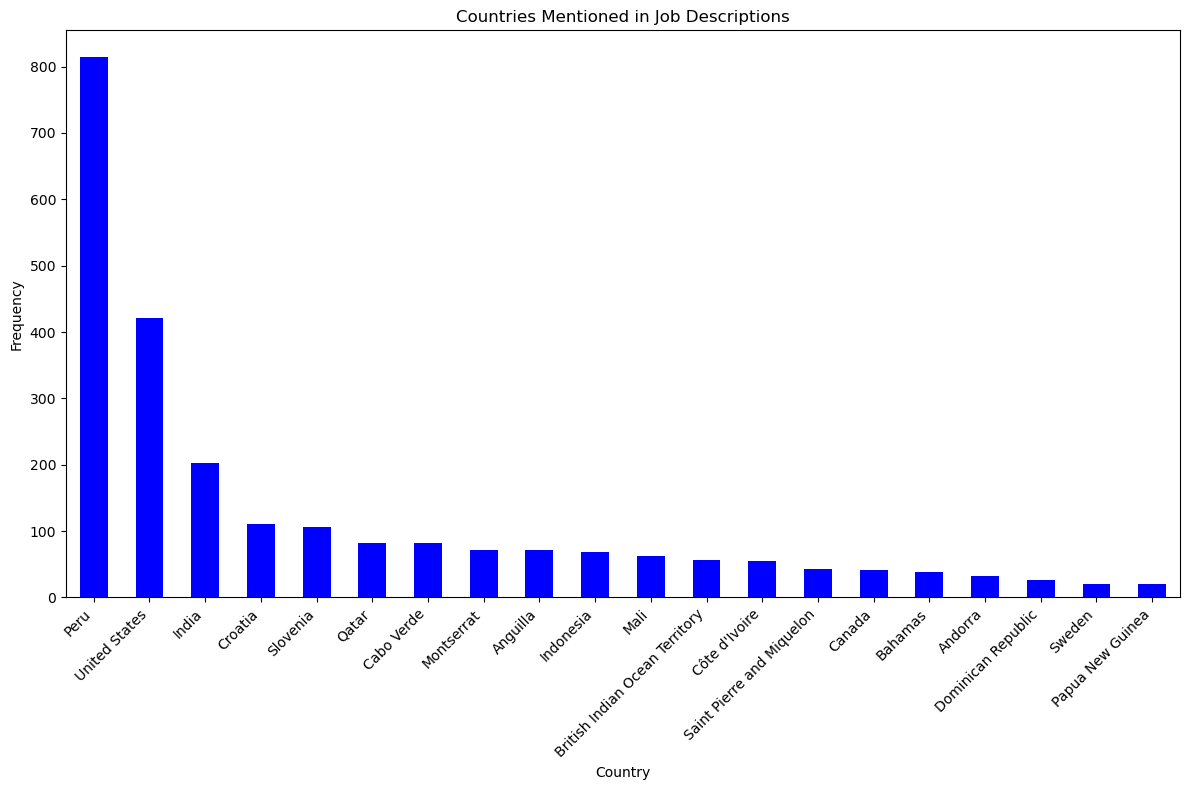

In [33]:

# Convert to pandas Series for easy manipulation and sorting
country_freq_series = pd.Series(country_frequencies)

# Sort frequencies in descending order
country_freq_sorted = country_freq_series.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
country_freq_sorted[:20].plot(kind='bar', color='blue')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.title('Countries Mentioned in Job Descriptions')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

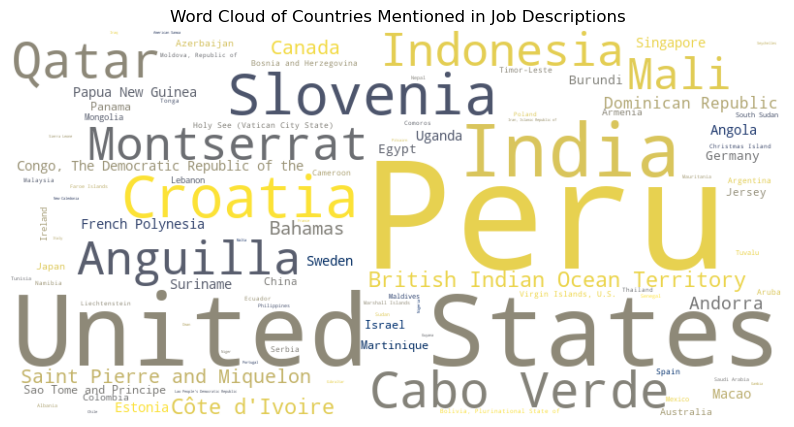

In [34]:
# Convert country frequencies to a dictionary format
country_freq_dict = country_freq_sorted.to_dict()

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='cividis').generate_from_frequencies(country_freq_dict)

# Plotting
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Countries Mentioned in Job Descriptions')
plt.show()

## Data Visualization-- Job Titles

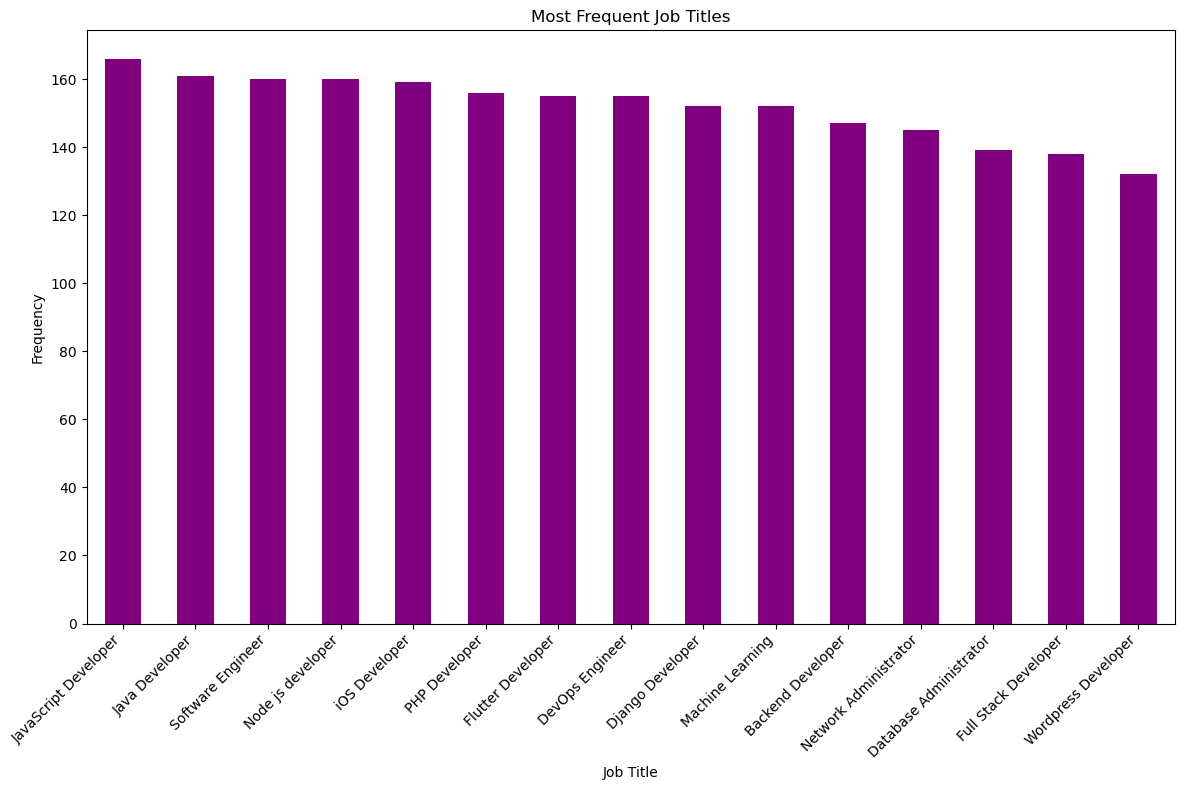

In [35]:
# Sort job titles by frequency (optional but recommended for better readability)
job_title_counts_sorted = job_title_counts.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
job_title_counts_sorted[:20].plot(kind='bar', color='purple')
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.title('Most Frequent Job Titles')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()